In [1]:
# [INCLUDES] ------------------------------------
from Includes import *
import yfinance
import sqlite3
import pandas

In [2]:
# [CREATE TABLE] ----------------------------- 
TABLE_NAME = 'nifty50'
conn = sqlite3.connect("databases/indices.db")
cur = conn.cursor()

In [ ]:
# [GET DATA] -----------------------------
TICKER = "^NSEI"
PERIOD = "max"
def Fetch():
    ticker_data = yfinance.download(tickers=TICKER, period=PERIOD, multi_level_index=False)
    if ticker_data is None:
        print("[FETCH] Empty ticker data returned")
    else:
        # print(ticker_data.head())
        return ticker_data
    return None
ticker_data = Fetch()

# [FORMAT DATA] -----------------------------
ticker_data.drop(columns=['Volume'], inplace=True)
ticker_data.reset_index(inplace=True) # remove the date from index
ticker_data.rename(columns={'Date' : 'date', 'Close' : 'close', 'High' : 'high', 'Low' : 'low', 'Open' : 'open'}, inplace=True)
print(ticker_data)


C:\Users\itizs\AppData\Local\Temp\ipykernel_1748\933016639.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  ticker_data = yfinance.download(tickers=TICKER, period=PERIOD, multi_level_index=False)
[*********************100%***********************]  1 of 1 completed

                  Close         High          Low         Open  Volume
Date                                                                  
2007-09-17  4494.649902  4549.049805  4482.850098  4518.450195       0
2007-09-18  4546.200195  4551.799805  4481.549805  4494.100098       0
2007-09-19  4732.350098  4739.000000  4550.250000  4550.250000       0
2007-09-20  4747.549805  4760.850098  4721.149902  4734.850098       0
2007-09-21  4837.549805  4855.700195  4733.700195  4752.950195       0
           date         close          high           low          open
0    2007-09-17   4494.649902   4549.049805   4482.850098   4518.450195
1    2007-09-18   4546.200195   4551.799805   4481.549805   4494.100098
2    2007-09-19   4732.350098   4739.000000   4550.250000   4550.250000
3    2007-09-20   4747.549805   4760.850098   4721.149902   4734.850098
4    2007-09-21   4837.549805   4855.700195   4733.700195   4752.950195
...         ...           ...           ...           ...           ...

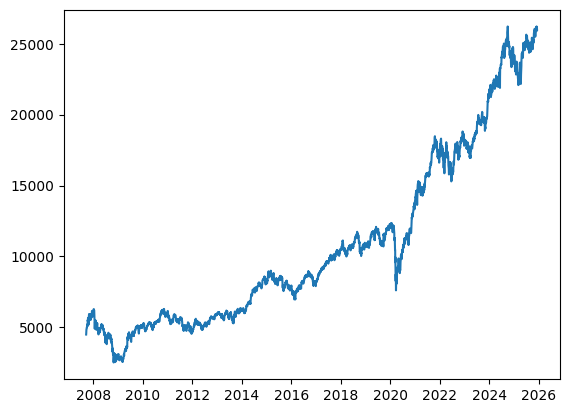

In [5]:
# [SAVE TO DATABASES' TABLE] -----------------------------
ticker_data.to_sql('nifty50', conn, if_exists='replace', index=False) # NO NEED OT MAKE DB TABLE MANUALLY THEN ??!!
df = pandas.read_sql("SELECT * FROM nifty50", conn)

# [PLOT FOR VERIFICATION] -----------------------------
import matplotlib.pyplot as plt

def plotter(conn, table):
    df = pandas.read_sql(f"SELECT * FROM {table}", conn)
    df['date'] = pandas.to_datetime(df['date']) # IMPORTANT
    df.set_index('date', inplace=True)

    plt.plot(df['close'])
    plt.show()

plotter(conn, 'nifty50')

In [ ]:
conn.close()

In [9]:
# [MAKE UP INDICATORS]
conn = sqlite3.connect('databases/indices.db')
cur = conn.cursor()
def make_basic_indicators(table, conn):
    df = pandas.read_sql(f"SELECT * FROM {table}", conn)
    df['SMA20'] = MovingAvg(df, 20, 'close')
    df['SMA50'] = MovingAvg(df, 50, 'close')

    return df
print(make_basic_indicators('nifty50', conn))

                     date         close          high           low  \
0     2007-09-17 00:00:00   4494.649902   4549.049805   4482.850098   
1     2007-09-18 00:00:00   4546.200195   4551.799805   4481.549805   
2     2007-09-19 00:00:00   4732.350098   4739.000000   4550.250000   
3     2007-09-20 00:00:00   4747.549805   4760.850098   4721.149902   
4     2007-09-21 00:00:00   4837.549805   4855.700195   4733.700195   
...                   ...           ...           ...           ...   
4463  2025-11-27 00:00:00  26215.550781  26310.449219  26141.900391   
4464  2025-11-28 00:00:00  26202.949219  26280.750000  26172.400391   
4465  2025-12-01 00:00:00  26175.750000  26325.800781  26124.199219   
4466  2025-12-02 00:00:00  26032.199219  26154.599609  25997.849609   
4467  2025-12-03 00:00:00  25986.000000  26066.449219  25891.000000   

              open         SMA20         SMA50  
0      4518.450195           NaN           NaN  
1      4494.100098           NaN           NaN  
